In [230]:
!pip install kaggle
!pip install wordcloud

In [231]:
import pandas as pd
import json
from google.colab import files
import collections
import wordcloud 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.colors import n_colors
import plotly.io as pio

In [238]:
#For the jupyterLab
pio.renderers.default = "notebook_connected"
#For google colab
#pio.renderers.default = "colab"

In [89]:
def upload_files():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

In [233]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [234]:
!kaggle datasets download -d shashwatwork/impact-of-covid19-pandemic-on-the-global-economy

impact-of-covid19-pandemic-on-the-global-economy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [235]:
!unzip impact-of-covid19-pandemic-on-the-global-economy.zip

Archive:  impact-of-covid19-pandemic-on-the-global-economy.zip
replace raw_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace transformed_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [239]:
df = pd.read_csv('/content/transformed_data.csv')

In [240]:
df.head()

CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [242]:
df.describe()

HDI            TC  ...           POP        GDPCAP
count  44216.000000  50418.000000  ...  50418.000000  50418.000000
mean       0.720139      6.762125  ...     15.442097      8.318580
std        0.160902      3.637347  ...      2.495039      3.177130
min        0.000000      0.000000  ...      6.695799      0.000000
25%        0.601000      4.158883  ...     14.151619      7.955479
50%        0.752000      7.092574  ...     15.929201      9.368531
75%        0.847000      9.504669  ...     17.187513     10.237704
max        0.953000     15.914092  ...     21.087439     11.669379

[8 rows x 6 columns]

In [243]:
df.columns = ["Code","Country","Date","Human_development_index","LN(Total_cases)","LN(Total_deaths)","LN(Strigency_index)","LN(Population)","LN(Gdp_per_capita)"]

In [244]:
print("Ilość różnych państw zawartych w zbiorze danych: {}".format(len(df["Country"].unique())))

Ilość różnych państw zawartych w zbiorze danych: 210


In [245]:
print("Zakres czasu podany w zbiorze danych: {} - {}".format(df["Date"].unique()[0],df["Date"].unique()[-1]))

Zakres czasu podany w zbiorze danych: 2019-12-31 - 2020-10-19


In [246]:
def make_pivot(df,values,index,columns):
  p_table = pd.pivot_table(df,values=[values],index = [index],columns= [columns])
  return p_table

In [247]:
make_pivot(df,'LN(Total_cases)','Country',"Date").loc[['China',"United States"],('LN(Total_cases)', '2019-12-31'):('LN(Total_cases)', '2020-02-15')]

LN(Total_cases)             ...                      
Date               2019-12-31 2020-01-01  ... 2020-02-14 2020-02-15
Country                                   ...                      
China                3.295837   3.295837  ...  11.066966  11.105844
United States        0.000000   0.000000  ...   2.708050   2.708050

[2 rows x 47 columns]

In [248]:
def prep_for_wc(col,count=False):
  if count == True:
    words = col.values
    words_count = collections.Counter(words)
    words_count = collections.OrderedDict(sorted(words_count.items(),key=lambda t: t[1],reverse=True)[:50])
  else:
    words_count = col
  return words_count

In [249]:
def plot_wc(text,image,title,bg_color = 'black',con_color='red',contour_width=20,count=False):
  mask = np.array(Image.open(image))
  wc = wordcloud.WordCloud(background_color=bg_color, mask=mask,contour_width=contour_width, contour_color=con_color)
  if count == True:
    wc.generate_from_frequencies(text)
  else:
    wc.generate(text)
  image_colors = wordcloud.ImageColorGenerator(mask)
  wc.recolor(color_func=image_colors)
  plt.figure(figsize=(28,18))
  plt.title(title)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [250]:
upload_files()

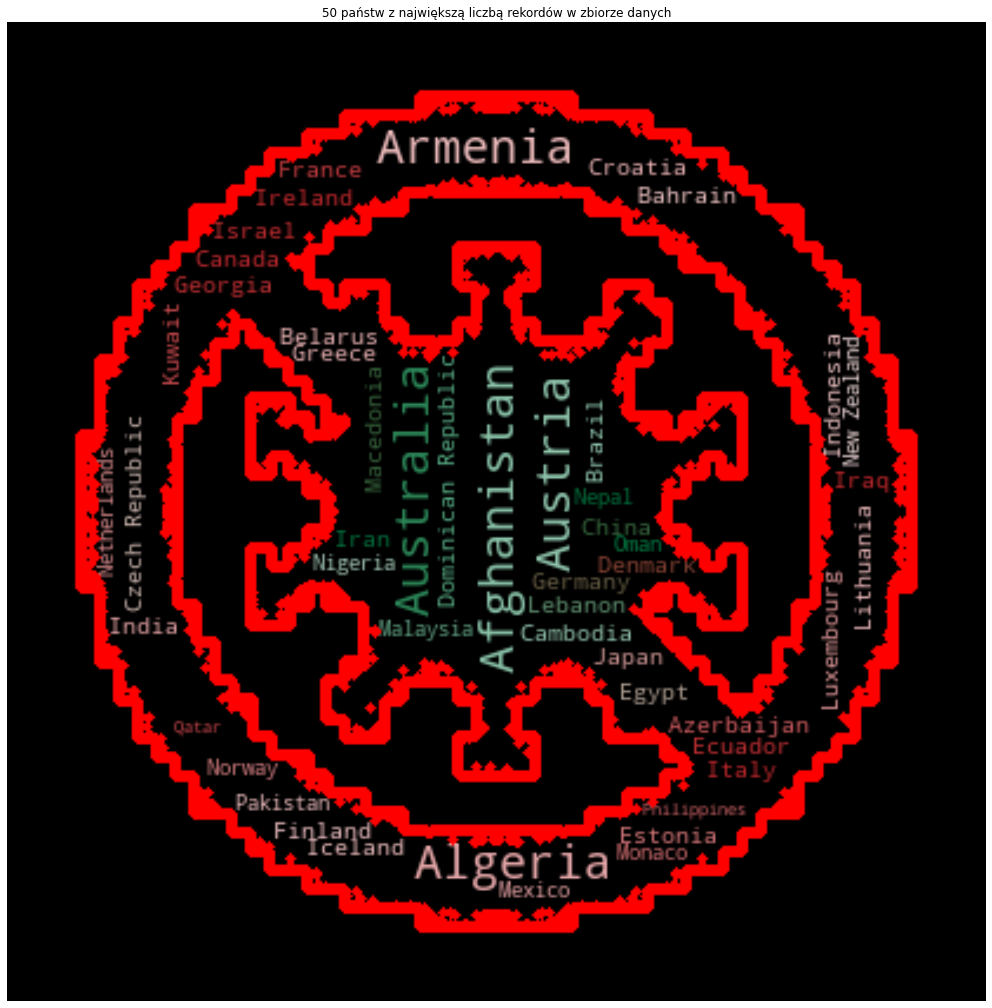

In [251]:
plot_wc(prep_for_wc(df["Country"],count=True),'istockphoto-1218423918-170667a.jpg',contour_width=5,title="50 państw z największą liczbą rekordów w zbiorze danych",count=True)

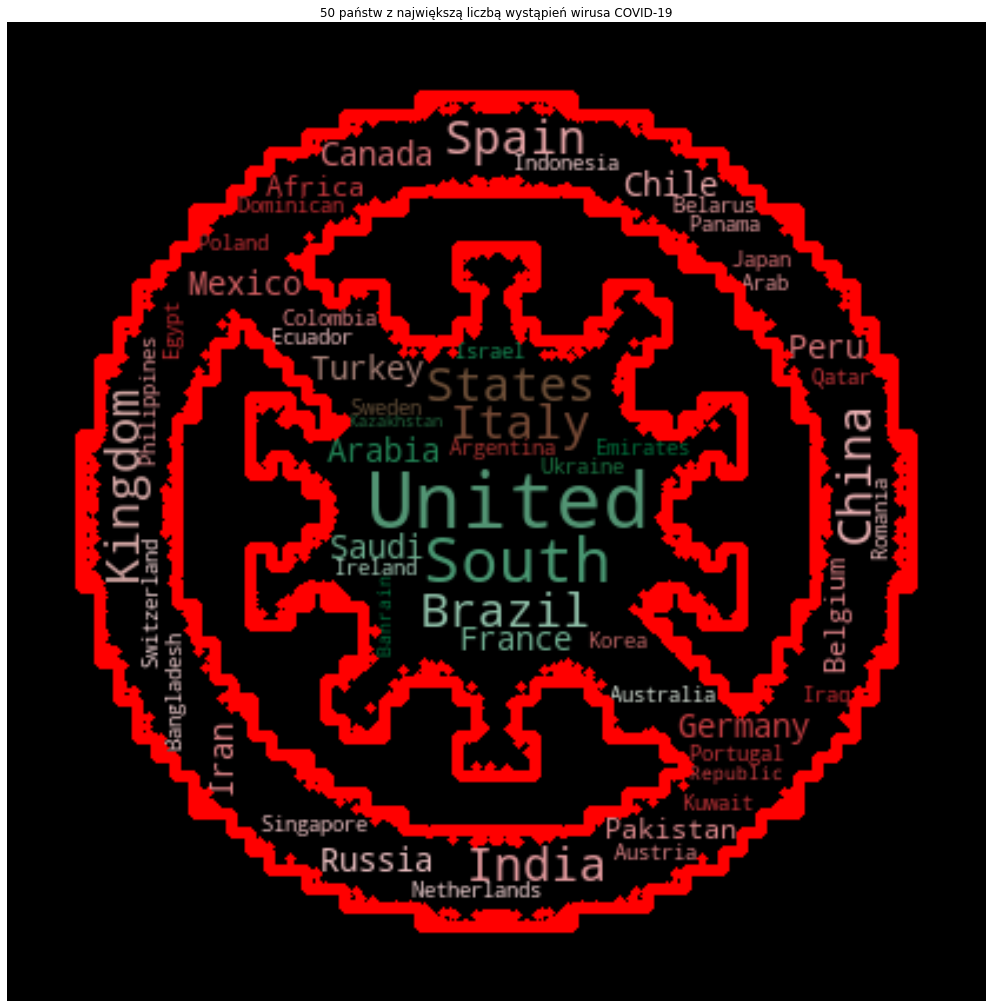

In [252]:
plot_wc(prep_for_wc(" ".join(df.groupby('Country').sum()["LN(Total_cases)"].reset_index().sort_values('LN(Total_cases)',ascending=False)["Country"].values[:50]),count=False),\
        'istockphoto-1218423918-170667a.jpg',contour_width=5,title="50 państw z największą liczbą wystąpień wirusa COVID-19")

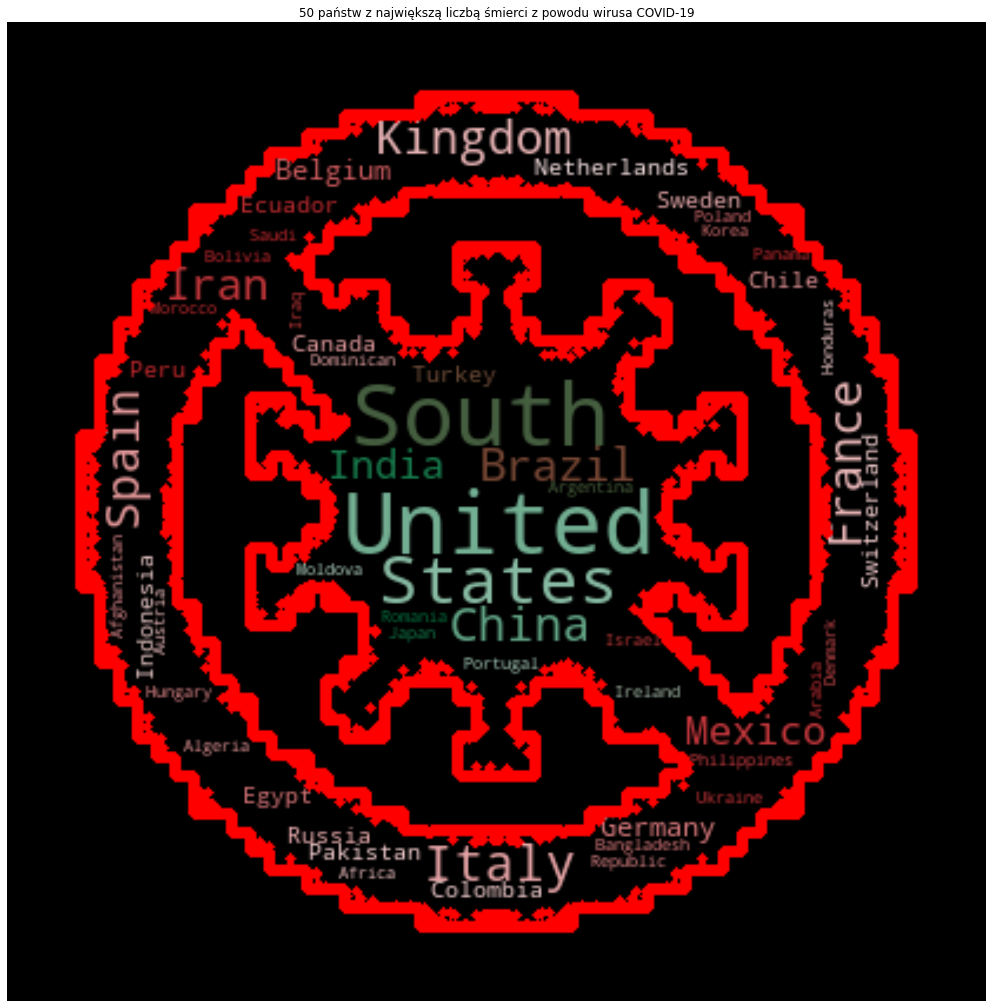

In [253]:
plot_wc(prep_for_wc(" ".join(df.groupby('Country').sum()["LN(Total_deaths)"].reset_index().sort_values('LN(Total_deaths)',ascending=False)["Country"].values[:50]),count=False),\
        'istockphoto-1218423918-170667a.jpg',contour_width=5,title="50 państw z największą liczbą śmierci z powodu wirusa COVID-19")

In [254]:
def plot_bubble_chart(df,x,y,hover_name,title,xtitle,ytitle,size=None,color=None):
  fig = px.scatter(df, x=x, y=y,
        size=size, color = color,
              hover_name=hover_name,size_max=150,color_continuous_scale=['red','green','blue'])
  fig.update_layout(
  title=title,
  xaxis=dict(
      title=xtitle,
      gridcolor='white',
      type='log',
      gridwidth=2,
  ),
  yaxis=dict(
      title=ytitle,
      gridcolor='white',
      gridwidth=2,
  ),
  paper_bgcolor='rgb(255, 255, 255)',
  plot_bgcolor='rgb(255, 255, 255)',
  height = 600,
  width = 1500
  )
  fig.show()

In [255]:
grouped_df = df.groupby("Country").agg({"LN(Total_cases)":"sum","LN(Gdp_per_capita)":"max","LN(Population)":"max","LN(Strigency_index)":"mean"}).reset_index()
grouped_df["Population"] = grouped_df["LN(Population)"].apply(lambda x: np.exp(x))

In [256]:
plot_bubble_chart(df=grouped_df,x="LN(Gdp_per_capita)",y="LN(Total_cases)",size='Population',color="LN(Strigency_index)",hover_name="Country",\
                  title="Wykres punktowy przedstawiający ilość wszystkich wystąpień zarażeniem COVID-19 względem danego kraju\nw zależności od populacji, wskaźnika GDP, współczynnika surowości",\
                  xtitle="Logarytm naturalny z współczynnika gdp",ytitle="Suma wszystkich wystąpień wirusa COVID-19")

In [257]:
grouped_df = df.groupby("Country").agg({"LN(Total_deaths)":"sum","LN(Gdp_per_capita)":"max","LN(Population)":"max","LN(Strigency_index)":"mean"}).reset_index()
grouped_df["Population"] = grouped_df["LN(Population)"].apply(lambda x: np.exp(x))

In [258]:
plot_bubble_chart(df=grouped_df,x="LN(Gdp_per_capita)",y="LN(Total_deaths)",size='Population',color="LN(Strigency_index)",hover_name="Country",\
                  title="Wykres punktowy przedstawiający ilość wszystkich wystąpień zarażeniem COVID-19 względem danego kraju\nw zależności od populacji, wskaźnika GDP, współczynnika surowości",\
                  xtitle="Logarytm naturalny z współczynnika gdp",ytitle="Suma wszystkich śmierci z powodu wirusa COVID-19")

In [259]:
def plot_map(df,loc,hover_name,color=None,animation_frame=None):
  fig = px.choropleth(df, locations=loc, color=color,
                     hover_name=hover_name,
                     animation_frame=animation_frame,
                     projection="natural earth")
  fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
  fig.update_layout(height=750, margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()

In [260]:
plot_map(df,'Code','Country','LN(Total_cases)',animation_frame='Date')

In [261]:
plot_map(df,'Code','Country','LN(Total_deaths)',animation_frame='Date')

In [262]:
plot_map(df,'Code','Country','LN(Strigency_index)',animation_frame='Date')